# Problem

Because we have measurements for which we know the correct species of iris, this is a supervised learning problem. In this problem, we want to predict one of the several options (species of iris), hence an example of a classification problem. Every iris in the dataset belongs to one of the three classes, so this is a three-calss classification problem.

## The data

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# The iris object returned by load_iris() is a Bunch object, which is similar to a dictionary. It contains keys and values.

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The value of DESCR is a short description of the dataset:

In [3]:
print(iris_dataset['DESCR'][:] + "\n")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

The value of the key target_names is an array of strings, containing the species of the flower that we want to predict:

In [4]:
print("Target names: \n{}".format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


The values of feature_names is a list of strings, giving the description of each feature:

In [5]:
print("Feature_names: \n{}".format(iris_dataset['feature_names']))

Feature_names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the four features recorded for each flower:

In [7]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


Here we have 150 samples having 4 features each.

In [8]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The target array contains the species of each of the flowers that were measured, also as a Numpy array:

In [9]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


target is a one dimensional array with one entry per flower:

In [10]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [11]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here 0 means setosa, 1 means versicolor and 2 means virginica.

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

before making the split, the train_test_split function shuffles the dataset using a pseudorandom number generator. This shuffle helps to better generalize our model and also makes sure the test data contains data from all classes.

To make sure that we will get the same outputif we run the same function several times, we provide the pseudorandom number generatpor with a fixed seed using the random_state parameter. This will make the outcome deterministic, so this line will always have the same outcome.

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


The output of the train_test_split function is X_train, X_test, y_train and y_test which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%.

In [15]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


Before building a machine learning model it is often good to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Aditionally, inspecting your data is a good way to find abnormalities and pecularities. Maybe some of your irises may be measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common.

One of the best ways to inspect data is to visualize it.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# create dataframe from data in X_train
# label the columns using the strings in the iris_dataset.feature_names
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


/home/saurabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


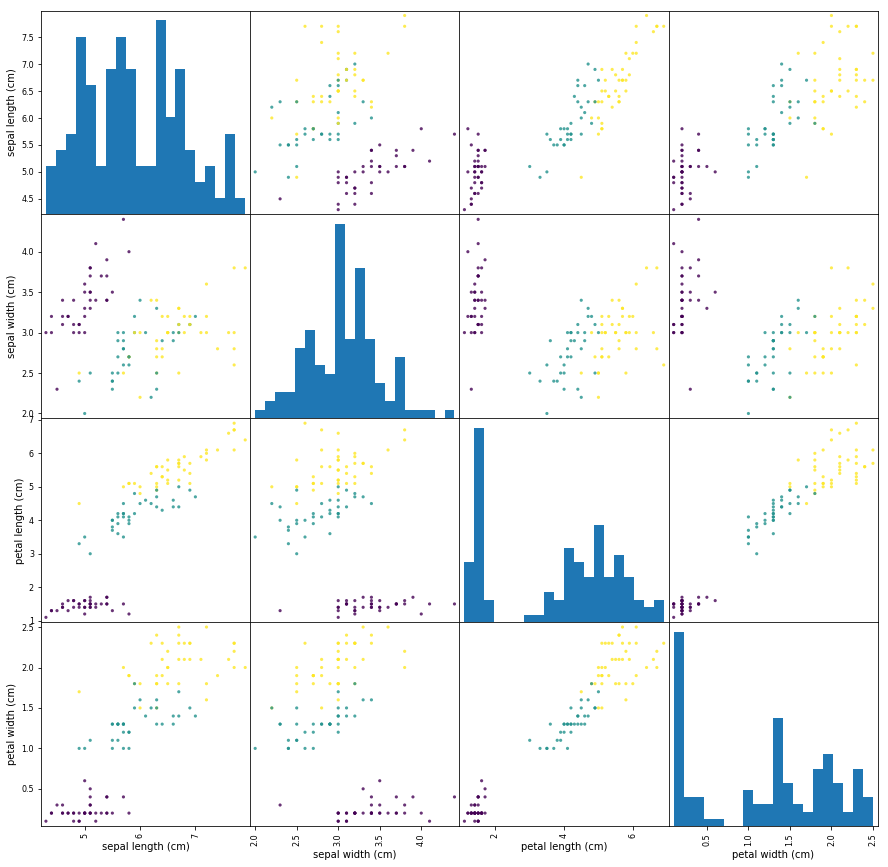

In [33]:
# create a scatter matrix from the dataframe, color by y_train
plot=pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20},s=10,alpha=.8)

From the plots, we can see that the three classes seem to be relatively well seperated using the sepal and petal measurements. This means that a machine learning model will likely be able to seperate them.

## Using k-Nearest Neighbors

To make a prediction for a new data point, the algorithm finds thepoint in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

### building the model

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### making predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [37]:
import numpy as np
X_new=np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [38]:
# To make a prediction, we call the predict method of the knn object:
prediction=knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model

In [39]:
y_pred=knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [40]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set score: 0.97


In [42]:
# We can also use the score method of the knn object, which will compute the test set accuracy for us:
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.97


# Tada! You,ve just successfully classified 97% of the irises.